In [2]:
import numpy as np
import pySNOM
from pySNOM import readers
from pySNOM import spectra
from pySNOM.spectra import NeaSpectrum
from pySNOM.interferograms import NeaInterferogram
import os

fdata = 'data/testifg_singlepoint.txt'
data_reader = readers.NeaSpectralReader(fdata)
data, measparams = data_reader.read()

fref = 'data/testifg_singlepoint_ref.txt'
ref_reader = readers.NeaSpectralReader(fref)
refdata, refmeasparams = ref_reader.read()

ifg = NeaInterferogram(data,measparams,filename=fdata)
ifg_ref = NeaInterferogram(refdata,refmeasparams,filename=fdata)

In [3]:
print(f' Measurement mode: {ifg.mode}\n Scan type: {ifg.scantype}')
print(f' Data keys: {list(ifg.data.keys())}')
print(f' Data shape: {np.shape(ifg.data["O3A"])}')

 Measurement mode: nanoFTIR
 Scan type: Point
 Data keys: ['Row', 'Column', 'Run', 'Depth', 'Z', 'M', 'O0A', 'O0P', 'O1A', 'O1P', 'O2A', 'O2P', 'O3A', 'O3P', 'O4A', 'O4P', 'O5A', 'O5P']
 Data shape: (9600,)


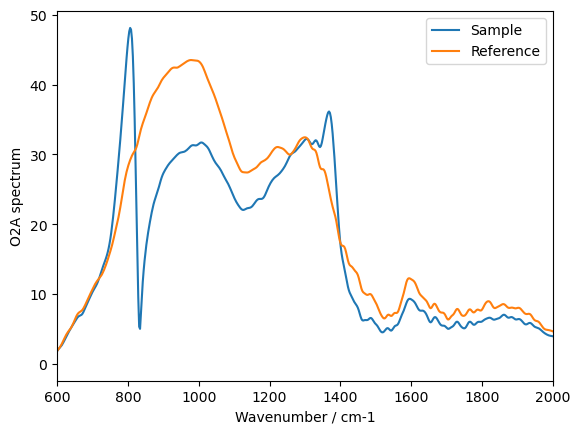

In [4]:
from pySNOM.interferograms import NeaInterferogram, ProcessSingleChannel, ProcessMultiChannels, ProcessAllPoints

s = ProcessAllPoints().transform(ifg)
r = ProcessAllPoints().transform(ifg_ref)

channel = "O2A"
import matplotlib.pyplot as plt
plt.plot(s.data["Wavenumber"],s.data[channel],r.data["Wavenumber"], r.data[channel])
plt.xlabel("Wavenumber / cm-1")
plt.xlim(600, 2000)
plt.ylabel(f'{channel} spectrum')
plt.legend(['Sample', 'Reference'])

[]

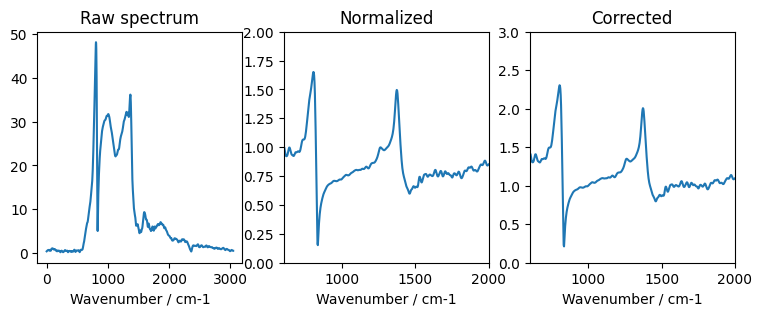

In [25]:
import matplotlib.pyplot as plt

channel = "O2A"
normdata = spectra.NormalizeSpectrum(spectra.DataTypes.Amplitude).transform(s.data[channel],r.data[channel])
corrdata = spectra.LinearNormalize(wavenumber1=1000, wavenumber2=2200, datatype=spectra.DataTypes.Amplitude).transform(normdata,s.data["Wavenumber"])

# Plotting the raw data
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(900*px, 300*px))
im1=ax1.plot(s.data["Wavenumber"], s.data[channel])
ax1.set_title('Raw spectrum')
ax1.set_xlabel("Wavenumber / cm-1")

# Plotting the normalized
im2=ax2.plot(s.data["Wavenumber"],normdata)
ax2.set_title('Normalized')
ax2.set_xlabel("Wavenumber / cm-1")
ax2.set_xlim(600, 2000)
ax2.set_ylim(0, 2)

# Plotting the corrected data
im3=ax3.plot(s.data["Wavenumber"],corrdata)
ax3.set_title('Corrected')
ax3.set_xlabel("Wavenumber / cm-1")
ax3.set_xlim(600, 2000)
ax3.set_ylim(0, 3)

plt.plot()